In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("vendas_tratadas.xlsx")
print(df)

In [ ]:
# 1. Total de vendas por loja - Agrupar por loja e somar o valor total vendido
plt.figure(figsize=(10,5))

vendas_por_loja = df.groupby('Loja')['Valor_venda'].sum()
vendas_por_loja.plot(kind='bar', color='red')

plt.title('Total de Vendas')

plt.xlabel('Loja')
plt.ylabel('Número de Vendas')


plt.grid(True)
plt.legend()

# Mostrar o gráficos
plt.show()

In [ ]:
# 2. Evolução mensal de vendas -  Identificar sazonalidades e picos mensais.
plt.figure(figsize=(10,5))
df['ano_mes'] = df['Data'].dt.to_period('M')
vendas_por_mes = df.groupby('ano_mes')['Valor_venda'].sum()
vendas_por_mes.plot(marker='o', linestyle='-', color='red')

plt.title('Total de Vendas')

plt.xlabel('Data')
plt.ylabel('Número de Vendas')


plt.grid(True)
plt.legend()

# Mostrar o gráficos
plt.show()

In [ ]:
# 3. Agrupar por mês e somar vendas
plt.figure(figsize=(10,5))
df['ano_mes'] = df['Data'].dt.to_period('M')
vendas_por_mes = df.groupby('ano_mes')['Valor_venda'].sum()
vendas_por_mes.plot(kind='bar', color='red')

plt.title('Total de Vendas mensais')

plt.xlabel('Data')
plt.ylabel('Número de Vendas')


plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

# Mostrar o gráficos
plt.show()

In [ ]:
# 4. Produtos mais vendidos (por volume) Objetivo: saber o que mais sai no caixa.
plt.figure(figsize=(10,5))
vendas_por_mes = df.groupby('Produto')['Valor_venda'].sum()
vendas_por_mes.plot(kind='bar', color='blue')

plt.title('Total de Vendas por Produto')
plt.xlabel('Produto')
plt.ylabel('Número de Vendas')


plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

# Mostrar o gráficos
plt.show()

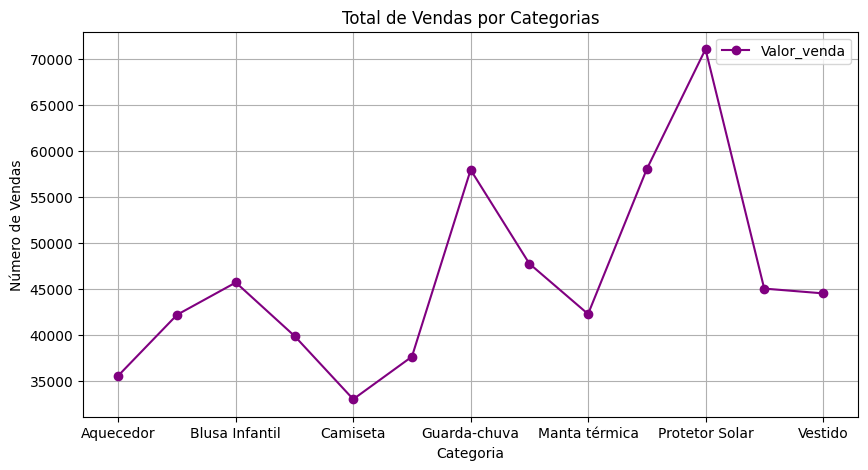

In [37]:
# 5. Comparação entre categorias. Objetivo: analisar quais categorias são mais lucrativas.
plt.figure(figsize=(10,5))
vendas_por_categorias = df.groupby('Produto')['Valor_venda'].sum()
vendas_por_categorias.plot(marker='o', linestyle='-', color='purple')

plt.title('Total de Vendas por Categorias')
plt.xlabel('Categoria')
plt.ylabel('Número de Vendas')


plt.grid(True)
plt.legend()

# Mostrar o gráficos
plt.show()


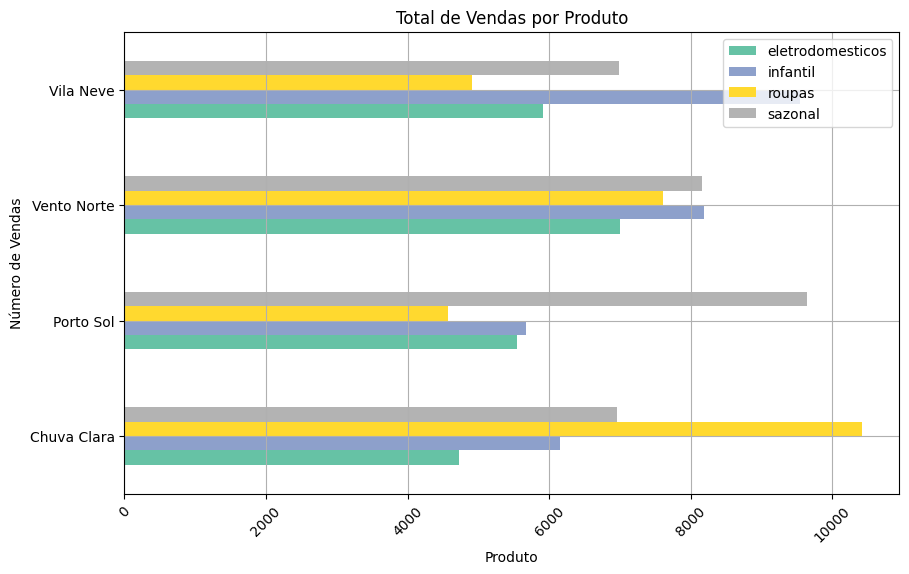

In [50]:
# 7 6. Comparação entre lojas por categoria. Objetivo: avaliar se há especialização ou foco
# diferente entre as lojas, com base nas categorias que mais vendem.
comparacao = df.groupby(['Loja', 'Categoria'])['Valor Unitário'].sum().reset_index()

tabela_pivot = comparacao.pivot(index='Loja', columns='Categoria', values='Valor Unitário')
tabela_pivot.plot(kind='barh', figsize=(10,6), colormap='Set2')

plt.title('Total de Vendas por Produto')
plt.xlabel('Produto')
plt.ylabel('Número de Vendas')


plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

# Mostrar o gráficos
plt.show()
